In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = np.arange(16).reshape((4,4))


In [3]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [4]:
a0 = np.arange(4).reshape((2,2))
a0

array([[0, 1],
       [2, 3]])

In [5]:
def hp_face_level_next(a):
    a0 = np.arange(4).reshape((2, 2))
    tilesize = a.shape[0]
    return np.repeat(np.repeat(a, 2, axis=0), 2, axis=1) * 4 + np.tile(a0, (tilesize, tilesize))

def hp_face_level(n):
    a = np.arange(4).reshape((2, 2))
    for i in range(n - 1):
        a = hp_face_level_next(a)
    return a


In [6]:
a = np.arange(16)
f2 = hp_face_level(2)
idx = a[f2.flatten()]
a[idx].reshape(4, 4)

array([[ 0,  1,  4,  5],
       [ 2,  3,  6,  7],
       [ 8,  9, 12, 13],
       [10, 11, 14, 15]])

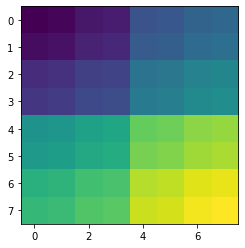

In [9]:
plt.imshow(hp_face_level(3));

In [12]:
f3 = hp_face_level(3)
f3

array([[ 0,  1,  4,  5, 16, 17, 20, 21],
       [ 2,  3,  6,  7, 18, 19, 22, 23],
       [ 8,  9, 12, 13, 24, 25, 28, 29],
       [10, 11, 14, 15, 26, 27, 30, 31],
       [32, 33, 36, 37, 48, 49, 52, 53],
       [34, 35, 38, 39, 50, 51, 54, 55],
       [40, 41, 44, 45, 56, 57, 60, 61],
       [42, 43, 46, 47, 58, 59, 62, 63]])

In [20]:
d3

array([[ 0,  0,  1,  1,  4,  4,  5,  5],
       [ 0,  0,  1,  1,  4,  4,  5,  5],
       [ 2,  2,  3,  3,  6,  6,  7,  7],
       [ 2,  2,  3,  3,  6,  6,  7,  7],
       [ 8,  8,  9,  9, 12, 12, 13, 13],
       [ 8,  8,  9,  9, 12, 12, 13, 13],
       [10, 10, 11, 11, 14, 14, 15, 15],
       [10, 10, 11, 11, 14, 14, 15, 15]])

In [15]:
np.bincount?

Docstring:
bincount(x, weights=None, minlength=0)

Count number of occurrences of each value in array of non-negative ints.

The number of bins (of size 1) is one larger than the largest value in
`x`. If `minlength` is specified, there will be at least this number
of bins in the output array (though it will be longer if necessary,
depending on the contents of `x`).
Each bin gives the number of occurrences of its index value in `x`.
If `weights` is specified the input array is weighted by it, i.e. if a
value ``n`` is found at position ``i``, ``out[n] += weight[i]`` instead
of ``out[n] += 1``.

Parameters
----------
x : array_like, 1 dimension, nonnegative ints
    Input array.
weights : array_like, optional
    Weights, array of the same shape as `x`.
minlength : int, optional
    A minimum number of bins for the output array.

    .. versionadded:: 1.6.0

Returns
-------
out : ndarray of ints
    The result of binning the input array.
    The length of `out` is equal to ``np.amax(x)+1`

In [29]:
%%timeit
d3 = np.digitize(f3, bins=np.arange(0, 64, 4)) - 1
(np.bincount(d3.ravel(), weights=f3.ravel()) / 4).reshape(4, 4)

14.4 µs ± 658 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


array([[ 0,  1,  4,  5, 16, 17, 20, 21],
       [ 2,  3,  6,  7, 18, 19, 22, 23],
       [ 8,  9, 12, 13, 24, 25, 28, 29],
       [10, 11, 14, 15, 26, 27, 30, 31],
       [32, 33, 36, 37, 48, 49, 52, 53],
       [34, 35, 38, 39, 50, 51, 54, 55],
       [40, 41, 44, 45, 56, 57, 60, 61],
       [42, 43, 46, 47, 58, 59, 62, 63]])

In [30]:
%%timeit
f3.reshape(4, 2, 4, 2).mean(axis=(1, 3))

12.6 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [27]:
f3.shape

(8, 8)